# Introduction

*This project have educational purposes, for me to apply and understood the depths of logistic regression and machine learning*

The goal of this project is to use logistic regression and machine learning to extract informations and relations between features, focusing on understanding if for this amount of data how much the income can influence on probability to develop diabetes.

# Basic imports

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

# Data

This dataset is based on BRFSS, Behavioral Risk Factor Surveillance System, an important survey applied by Center for Disease Control and Prevention (CDC) of USA, this survey collects data from all states and territories of the country focusing on general health

In [2]:
# https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv
# https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf
df = pd.read_csv("archive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [3]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


**Table description**
| Name | Description | Values |
| :-------- | :-------- | :-------- |
| Diabetes_binary | a dummy variable that shows if someone have diabetes | 0 = no diabetes; 1 = pre-diabetes, diabetes |
| HighBP | a dummy variable that shows if someone have high blood pressure | 0 = no; 1 = yes |
| HighChol | a dummy variable that shows if someone have high cholesterol| 0 = no; 1 = yes|
| BMI | Body max index| a number variable|
| Smoker| a variable that indicates if someone smoked at least 100 cigarettes in entire life| 0 = no; 1 = yes|
| Stroke| a dummy variable that indicates if someone had a stroke| 0 = no; 1 = yes|
| HeartDiseaseorAttack| a dummy variable that indicates if someone had a heart disease or attack| 0 = no; 1 = yes|
| PhysActivity| a dummy variable that indicates if someone did any physical activity in past 30 days| 0 = no; 1 = yes|
| Fruits| A variable that indicates if someone eat at least 1 fruit per day| 0 = no; 1 = yes|
| Veggies| A variable that indicates if someone eat at least 1 vegetables per day| 0 = no; 1 = yes|
| HvyAlcoholConsume| adult men >=14 drinks per week and adult women>=7 drinks per week| 0 = no; 1 = yes|
| AnyHealthCare| Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. | 0 = no; 1 = yes|
| NoDocBCCost| Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?| 0 = no; 1 = yes|
| GenHealth| Would you say that in general your health is | scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor|
| MentHlth| days of poor mental health | scale 1-30 days|
| PhysHltl| physical illness or injury days in past 30 days| scale 1-30 days|
| DiffWalk| a variable that indicates if someone have difficult to walk or clim stairs| 0 = no; 1 = yes|
| Sex| variable that indicates the gender of someone| 0 = female; 1 = male|
| Age| variable that indicates what class of age someone are in| _AGEG5YR see [codebook](https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf)|
| Education| variable that indicates how far someone went on education| EDUCA see [codebook](https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf)|
| Income| varible that indicates how much someone gain as income| INCOME2 see [codebook](https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf)|

In [4]:
# Check if is there any null values
df.isnull().mean()

Diabetes_binary         0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

## Distribuitions

### Dummy variables distribuitions

In [5]:
dummy_columns = ["Diabetes_binary", "HighBP", "HighChol", "Smoker", "Stroke", "HeartDiseaseorAttack",
                 "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
                "DiffWalk", "Sex"]

dummy_df = df[dummy_columns]

print("Ones quantities")

ones = np.array([])
zeros = np.array([])
titles = np.array([])

for column in dummy_df.columns:
    count_1 = np.count_nonzero(dummy_df[column])
    total = df[column].count()
    distribuitions = int((count_1 / total) * 100)
    ones = np.append(ones, count_1)
    zeros = np.append(zeros, total - count_1)
    titles = np.append(titles, column)
    
    print(f"{column}: {distribuitions:.2f}%")

Ones quantities
Diabetes_binary: 50.00%
HighBP: 56.00%
HighChol: 52.00%
Smoker: 47.00%
Stroke: 6.00%
HeartDiseaseorAttack: 14.00%
PhysActivity: 70.00%
Fruits: 61.00%
Veggies: 78.00%
HvyAlcoholConsump: 4.00%
AnyHealthcare: 95.00%
NoDocbcCost: 9.00%
DiffWalk: 25.00%
Sex: 45.00%


In [6]:
import plotly.graph_objs as go
import plotly.io as pio

pio.renderers.default = 'iframe' 

plot = go.Figure()
plot.add_trace(go.Bar(x = ones, y = titles, orientation="h", name="1"))
plot.add_trace(go.Bar(x = -zeros, y = titles, orientation="h", name="0", marker=dict(color = "#00FF00")))
plot.update_layout(barmode="overlay")

plt.tight_layout()
plt.savefig('grafico_diabetes.png', dpi=300, bbox_inches='tight')

plot.show()

<Figure size 640x480 with 0 Axes>

### Age distribuitions

In [7]:
# Age distribuitions
age_data = df["Age"]

counter = {}

# frequency table (handmade)
for i in range(len(age_data)):
    if counter.get(int(age_data[i])) != None:
        counter[int(age_data[i])] += 1
    else:
        counter[int(age_data[i])] = 1
        
sorted_keys = sorted(counter.items())
sorted_by_keys_counter = dict(sorted_keys)

age_classes = ["18 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 to 54", "55 to 59", "60 to 64", "65 to 69", "70 to 74", "75 to 79", "80 or older"]

age_frequencies = pd.DataFrame(index=age_classes, columns=["Quantity"], data=sorted_by_keys_counter.values())

age_frequencies

,Quantity
18 to 24,979
25 to 29,1396
30 to 34,2049
35 to 39,2793
40 to 44,3520
45 to 49,4648
50 to 54,6872
55 to 59,8603
60 to 64,10112
65 to 69,10856


<BarContainer object of 13 artists>

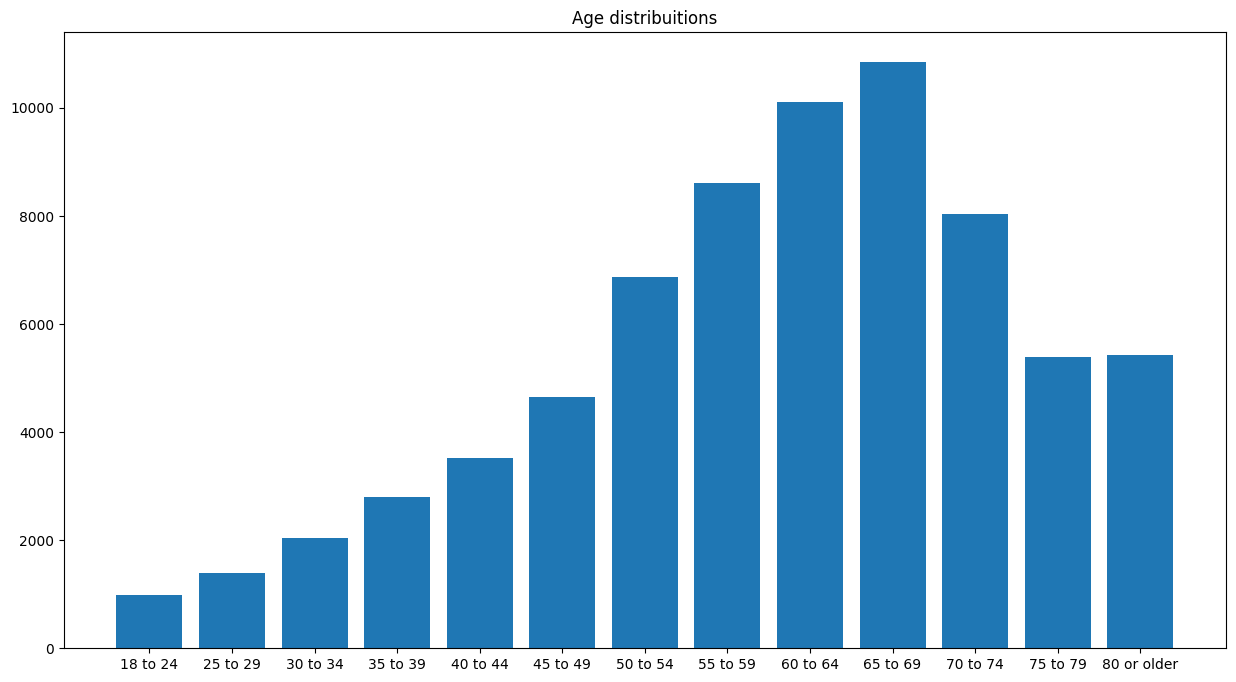

In [8]:
plt.figure(figsize=(15, 8))
plt.title("Age distribuitions")
plt.bar(age_classes, sorted_by_keys_counter.values())

In [39]:
# Calculating mean
medium_points = [21, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82]

values_list = list(sorted_by_keys_counter.values())
sum_f_x = 0
sum_f = 0

for i in range(len(medium_points)):
    sum_f_x += medium_points[i] * values_list[i]
    sum_f += values_list[i]

age_mean = sum_f_x / sum_f
print(f"Age mean: {age_mean:.2f}")

Age mean: 59.91


In [46]:
medium_point_minus_mean = []
medium_point_minus_mean_squared = []

for i in range(len(medium_points)):
    medium_point_minus_mean.append(medium_points[i] - age_mean)

print(f"medium points minus mean: {medium_point_minus_mean}")

for i in range(len(medium_points)):
    medium_point_minus_mean_squared.append(medium_point_minus_mean[i] * medium_point_minus_mean[i])

print(f"medium points minus mean squared: {medium_point_minus_mean_squared}")

for i in range(len(medium_points)):
    medium_point_minus_mean_squared.append(medium_point_minus_mean[i] * medium_point_minus_mean[i])

medium points minus mean: [-38.9064250551689, -32.9064250551689, -27.906425055168903, -22.906425055168903, -17.906425055168903, -12.906425055168903, -7.906425055168903, -2.906425055168903, 2.093574944831097, 7.093574944831097, 12.093574944831097, 17.093574944831097, 22.093574944831097]
medium points minus mean squared: [1513.7099105734746, 1082.8328099114478, 778.7685593597587, 524.7043088080696, 320.64005825638066, 166.5758077046916, 62.511557153002585, 8.44730660131356, 4.383056049624532, 50.3188054979355, 146.2545549462465, 292.1903043945575, 488.12605384286843]


In [50]:
import math

sum = 0
for i in range(len(medium_points)):
    sum += medium_point_minus_mean_squared[i] * values_list[i]

variance = sum / sum_f - 1
print(f"Variance: {variance:.2f}")

standard_deviation = math.sqrt(variance)

print(f"Standard deviation: {standard_deviation:.2f}")

Variance: 203.43
Standard deviation: 14.26


### Education distribuition

In [67]:
education = df["Education"]

# frequency table
education_frequencies = list(education.value_counts().sort_index())

education_classes = ["Never attended school or only kindergarten", "Grades 1 through 8 (Elementary)", 
                     "Grades 9 through 11 (Some high school)", "Grade 12 or GED (High school graduate)",
                    "College 1 year to 3 years (Some college or technical school)", "College 4 years or more (College graduate)"]

ed_frequency_table =  pd.DataFrame(index=education_classes, columns=["Quantity"], data=education_frequencies)
ed_frequency_table

,Quantity
Never attended school or only kindergarten,75
Grades 1 through 8 (Elementary),1647
Grades 9 through 11 (Some high school),3447
Grade 12 or GED (High school graduate),19473
College 1 year to 3 years (Some college or technical school),20030
College 4 years or more (College graduate),26020


<BarContainer object of 6 artists>

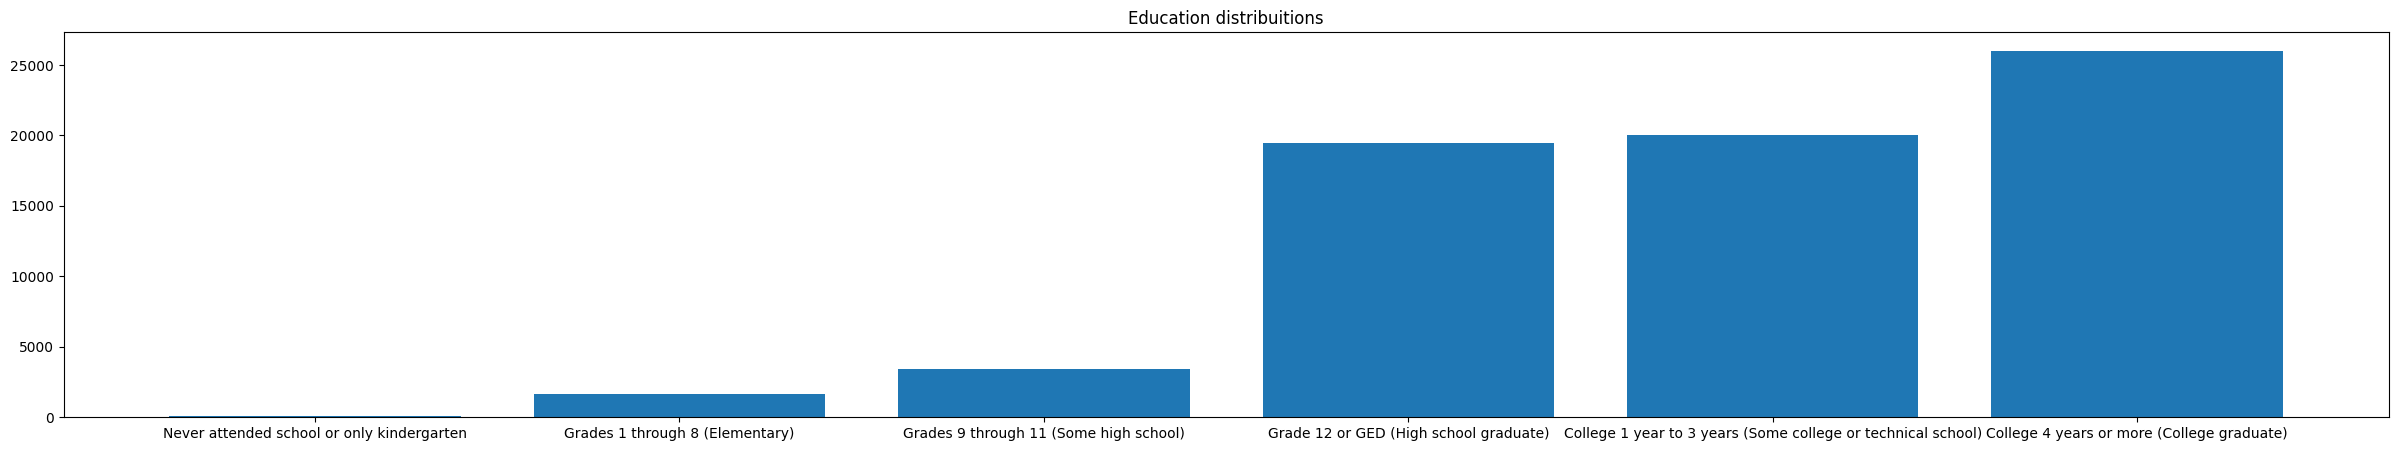

In [74]:
plt.figure(figsize=(30, 5))
plt.title("Education distribuitions")
plt.bar(education_classes, education_frequencies)

In [83]:
education_medium_points = [0, 4.5, 10, 12, 14, 16]

education_frequency_sum = 0
for i in range(len(education_frequencies)):
    education_frequency_sum += education_frequencies[i]

emp_x_f = []
for i in range(len(education_frequencies)):
    emp_x_f.append(education_frequencies[i] * education_medium_points[i])

sum_emp_x_f = 0
for i in range(len(education_frequencies)):
    sum_emp_x_f += emp_x_f[i]

education_mean = sum_emp_x_f / education_frequency_sum

print(f"Mean: {education_mean:.2f}")

Mean: 13.75


### Income distribuitions

<BarContainer object of 8 artists>

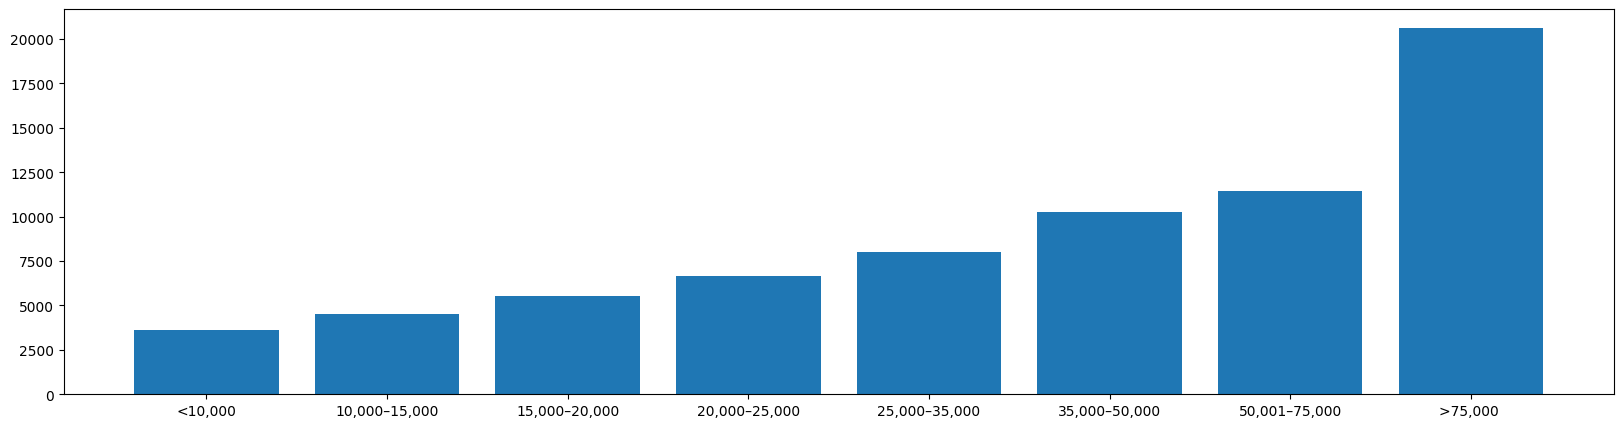

In [94]:
income = df["Income"]

income_frequencies = list(income.value_counts().sort_index())
income_classes = ["<10,000", "10,000–15,000", "15,000–20,000", "20,000–25,000", "25,000–35,000", "35,000–50,000", "50,001–75,000", ">75,000"]

plt.figure(figsize=(20, 5))
plt.bar(income_classes, income_frequencies)

In [100]:
income_medium_points = [5000 ,12500, 17500, 22500, 30000, 42500, 62500, 87,500]

income_frequencies_x_mp = 0
for i in range(len(income_frequencies)):
    income_frequencies_x_mp += income_medium_points[i] * income_frequencies[i]

sum_income_frequencies = 0
for i in range(len(income_frequencies)):
    sum_income_frequencies += income_frequencies[i]

income_mean = income_frequencies_x_mp / sum_income_frequencies

print(f"Annual income mean: {income_mean:.2f}")

Annual income mean: 24255.77


### BMI analysis

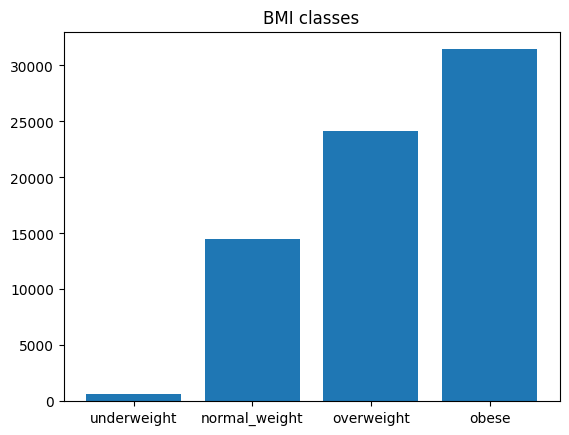

In [135]:
# Split the overall BMI into classes
bmi = df["BMI"]

underweight = list(bmi[bmi < 18.5])
normal_weight = list(bmi[(bmi >= 18.5) & (bmi < 25)])
overweight = list(bmi[(bmi >= 25) & (bmi < 30)])
obese = list(bmi[bmi >= 30])

bmi_classes = ["underweight", "normal_weight", "overweight", "obese"]
bmi_frequencies = [len(underweight), len(normal_weight), len(overweight), len(obese)]

plt.title("BMI classes")
plt.bar(bmi_classes, bmi_frequencies)
plt.show()

In [138]:
# calculate the mean
bmi_list = list(bmi)
sum_bmi = 0
for i in range(len(bmi)):
    sum_bmi += bmi_list[i]

bmi_mean = sum_bmi / len(bmi)

print(f"BMI mean: {bmi_mean:.2f} - overweight")

BMI mean: 29.86 - overweight


In [143]:
# calculate the median
sorted_bmi_list = sorted(bmi_list)

bmi_median = sorted_bmi_list[int(len(sorted_bmi_list) / 2)]
print(f"Median: {bmi_median} - overweight")

Median: 29.0 - overweight


### General health distribuitions

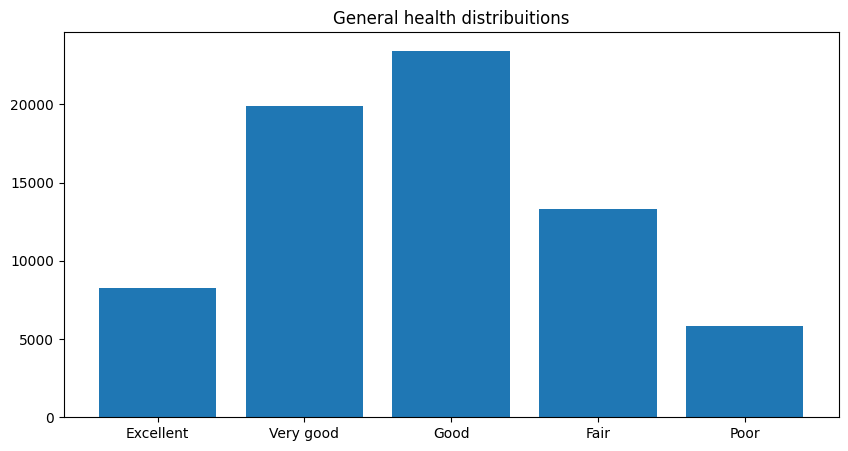

In [150]:
# Split the raw general health into the classes
gen_health = df["GenHlth"]

excellent = gen_health[gen_health == 1]
very_good = gen_health[gen_health == 2]
good = gen_health[gen_health == 3]
fair = gen_health[gen_health == 4]
poor = gen_health[gen_health == 5]

gen_health_classes = ["Excellent", "Very good", "Good", "Fair", "Poor"]
gen_health_frequencies = [len(excellent), len(very_good), len(good), len(fair), len(poor)]

plt.figure(figsize=(10, 5))
plt.title("General health distribuitions")
plt.bar(gen_health_classes, gen_health_frequencies)
plt.show()

In [154]:
# Calculating the mean
sum_gen_health_frequencies = 1 * len(excellent) + 2 * len(very_good) + 3 * len(good) + 4 * len(fair) + 5 * len(poor)

gen_health_mean = sum_gen_health_frequencies / len(gen_health)

print(f"General health mean: {gen_health_mean:.2f} - very good to good")

General health mean: 2.84 - very good to good


In [156]:
# Calculating median
gen_health_median = sorted(gen_health)[int(len(gen_health) / 2)]

print(f"General health median: {gen_health_median}")

General health median: 3.0
